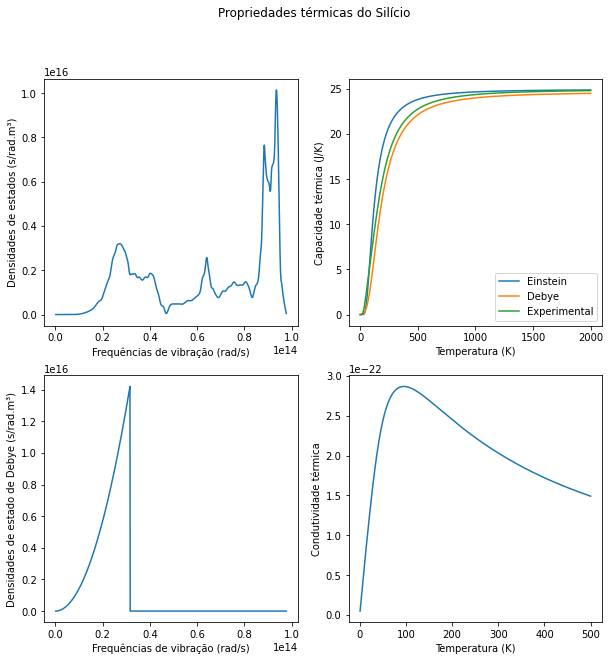

In [4]:
from extracaoDados import*
from modulo1 import*
from modulo2 import*
from modulo3 import*
from modulo4 import*
import warnings
import numpy as np
import matplotlib.pyplot as plt

#o numpy gera um aviso de estar usando o exponencial de um grande numero,
#mas o modulo lida normalmente com o calculo, logo podemos ignorar o aviso
warnings.filterwarnings('ignore')

#lendo os dados das frequências de vibração e densidades de estado do Silício
arquivo_si = open('dadosSilicio.txt', 'r')
omega_si = []
densidade_estados_si = []
ler_dados(omega_si, densidade_estados_si, arquivo_si)

#calculando a média das frequências de vibração para utilizar no modelo de Einstein
omega_si_einstein = sum(omega_si)/len(omega_si)

#definindo uma faixa de temperaturas
temperaturas = np.linspace(0.01,2000,10000)

#calculando as capacidades térmicas para os diferentes modelos, sabendo que a 
#velocidade do som no Silício é 2200 m/s (fonte: https://periodictable.com/Properties/A/SoundSpeed.al.html)
# e que sua densidade atômica é 4.99e28 átomos/m³

cv_si_einstein = cv_einstein(omega_si_einstein, 6.02e23, temperaturas)
cv_si_debye = cv_debye(omega_si, temperaturas, 2200, 6.02e23, 4.99e29)
cv_si_experimental = cv_densidade_experimental(omega_si, densidade_estados_si, temperaturas, 4.99e28)

#densidade de estados do modelo de Debye
densidade_debye_si = densidade_debye(omega_si, 2200, 4.99e28)

#lista de temperaturas para a condutividade térmica e cálculo da condutividade
temp_k = np.linspace(1,500,1000)
k_si = condutiv(omega_si, temp_k, 2200, 4.99e28)

#plotando as densidades de estados experimentais, os resultados das capacidades térmicas de 0.01 a 2000 K, 
# a densidade de estados para o modelo de Debye e a condutividade térmica do Silício de 1 a 500K

fig, ax = plt.subplots(2,2, figsize=(10,10))

fig.suptitle('Propriedades térmicas do Silício')

ax[0][0].plot(omega_si,densidade_estados_si)
ax[0][0].set_xlabel('Frequências de vibração (rad/s)')
ax[0][0].set_ylabel('Densidades de estados (s/rad.m³)')

ax[0][1].plot(temperaturas, cv_si_einstein, label='Einstein')
ax[0][1].plot(temperaturas, cv_si_debye, label='Debye')
ax[0][1].plot(temperaturas, cv_si_experimental, label='Experimental')
ax[0][1].set_xlabel('Temperatura (K)')
ax[0][1].set_ylabel('Capacidade térmica (J/K)')
ax[0][1].legend()

ax[1][0].plot(omega_si, densidade_debye_si)
ax[1][0].set_xlabel('Frequências de vibração (rad/s)')
ax[1][0].set_ylabel('Densidades de estado de Debye (s/rad.m³)')

ax[1][1].plot(temp_k, k_si) 
ax[1][1].set_xlabel('Temperatura (K)')
ax[1][1].set_ylabel('Condutividade térmica')
plt.show()